### In Pro - Classification algorithms using original imbalanced dataset

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt        # for plots
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report,roc_auc_score,plot_confusion_matrix

In [19]:
df = pd.read_csv('/home/jovyan/CTG_clean.csv')
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#### Splitting dataset into train and testing sets.

In [20]:
x = df.drop(['NSP'],axis=1).values     #classes
y = df['NSP'].values                   #features

# the dataset will be split into 25% for testing and 75% for training
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=11)

### 1. Scaling training set
Although scaling is not necesary for Random Forest or XGBoost, the dataset must be scaled for MLP.
The same scaled version of the dataset will be used for these three algorithms.
Only the features of the training and testing sets are scaled, keeping the classes unmodified.

In [21]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test) 

### 2. Random Forest

In [22]:
forest = RandomForestClassifier()
forest.fit(x_train_scaled,y_train)
y_pred_forest = forest.predict(x_test_scaled)
print("Random Forest accuracy:",accuracy_score(y_test,y_pred_forest))

Random Forest accuracy: 0.9511278195488722


In [23]:
print(classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       420
         2.0       0.85      0.81      0.83        75
         3.0       0.97      0.89      0.93        37

    accuracy                           0.95       532
   macro avg       0.93      0.90      0.91       532
weighted avg       0.95      0.95      0.95       532



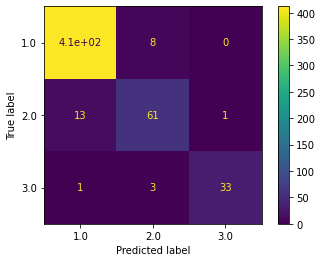

In [24]:
plot_confusion_matrix(forest, x_test_scaled, y_test)  
plt.show()

### 3. XGBoost

In [34]:
from xgboost import XGBClassifier

In [35]:
xgb = XGBClassifier(learning_rate=0.001)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print("XGBoost accuracy:",accuracy_score(y_test,y_pred_xgb))

XGBoost accuracy: 0.9285714285714286


In [36]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       420
         2.0       0.82      0.71      0.76        75
         3.0       0.92      0.92      0.92        37

    accuracy                           0.93       532
   macro avg       0.89      0.86      0.88       532
weighted avg       0.93      0.93      0.93       532



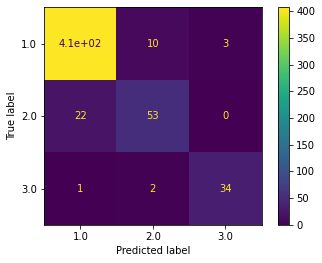

In [37]:
plot_confusion_matrix(xgb, x_test, y_test)  
plt.show()

### 4. MLP

In [31]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(max_iter = 800)

mlp.fit(x_train_scaled, y_train)
y_pred_mlp=mlp.predict(x_test_scaled)

In [32]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       420
         2.0       0.79      0.81      0.80        75
         3.0       0.89      0.86      0.88        37

    accuracy                           0.94       532
   macro avg       0.88      0.88      0.88       532
weighted avg       0.94      0.94      0.94       532



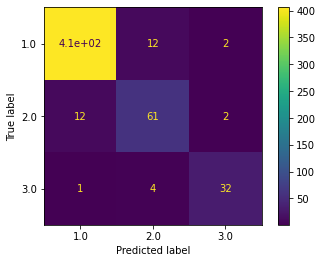

In [33]:
plot_confusion_matrix(mlp, x_test_scaled, y_test)  
plt.show()